In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import copy
import matplotlib.pyplot as plt
import os
import data_handler as dh
import seq2seq as model

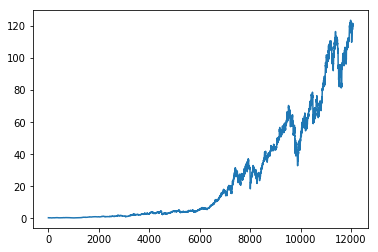

Data handler complete.


In [9]:
forecast_horizon = 8
input_seq_len = 256
train_val_split = 0.8

# Minute_data

# 11/09/2017 09:30
# 16/02/2018 15:59


minute_data =  'Data/dataset.csv'
daily_data = 'Data/Stocks/utx.us.txt'

handler = dh.data_handler(path = daily_data,
                          forecast_horizon = forecast_horizon,
                          input_seq_len = input_seq_len,
                          train_val_split = train_val_split,
                          backtest_windows = 4,
                          shuffled = False,
                          seed = 1)

X_train,Y_train,X_val,Y_val,X_test,Y_test,scaling_factor,scaling_bias = handler.get_data(scale = True,daily = True)
print("Data handler complete.")


In [12]:
class configuration():
    
    def __init__(self,scaling_factor,scaling_bias,forecast_horizon,input_seq_len):
        
        # Data scaling factor and bias
        self.scaling_factor = scaling_factor
        self.scaling_bias = scaling_bias
        # Input seq length
        self.input_seq_len = input_seq_len
        # Output sequence length
        self.output_seq_len = forecast_horizon
        # Num of hidden cells
        self.hidden_dim = 128
        # Num of input signals
        self.input_dim = 1
        # Num of output signals
        self.output_dim = 1
        # Num of stacked lstm layers
        self.num_stacked_layers = 1
        # Gradient clipping - to avoid gradient exploding
        self.GRADIENT_CLIPPING = 2.5
        # Num of training epochs
        self.epochs = 1
        # Save path
        self.save_path = 'models/daily/5_layers/'
        # Save name
        self.save_name = '150ep_shuffled'
        # Learning rate
        self.learning_rate = 0.001
        # L2 regularisation constant
        self.lambda_l2_reg = 0.001
        self.batch_size = 128


# Network parameter configuration
config = configuration(scaling_factor,scaling_bias,forecast_horizon,input_seq_len)

# # # Initial wallet amount
wallet = 1000

# # # Set network parameters
mod = model.model(config)

# # # Train network
# mod.train(X_train,Y_train)

# Backtest
mod.backtest(X_val,Y_val,wallet)


Backtesting...
Building graph
    - Weights init
    - Biases init
INFO:tensorflow:Restoring parameters from models/daily/5_layers/150ep_shuffled
Complete


Backtested profit in 2320 days is £ 284.34 .  Percentage return is 28.43 %
Percentage change in the last 8 days is: 0.0 %.
Percentage change in the last 16 days is: -1.66 %.
Percentage change in the last 24 days is: -3.42 %.
Percentage change in the last 32 days is: -4.55 %.


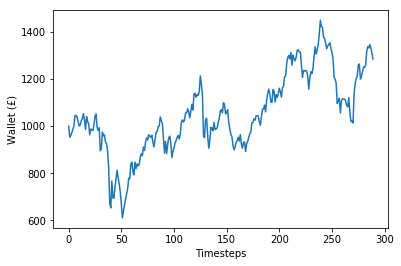

In [15]:
plt.plot(mod.wallet_change)
plt.xlabel("Timesteps")
plt.ylabel("Wallet (£)")
percentage_return = ((mod.wallet-wallet)/wallet)*100
print("Backtested profit in",(len(mod.wallet_change)*forecast_horizon),"days is £",round(mod.wallet-wallet,2),"."," Percentage return is",round(percentage_return,2),"%")
locations = [1,2,3,4]

def change(locations,wallet_change):
    percentage_change = []
    final = wallet_change[-1]

        
    for loc in locations:
        initial = wallet_change[len(wallet_change)-loc]
        value = ((final-initial)/initial)*100
        percentage_change = np.append(percentage_change,value)
    
    return percentage_change

percentage_change = change(locations,mod.wallet_change)

for loc in range(len(percentage_change)):
    print("Percentage change in the last",locations[loc]*forecast_horizon,"days is:",round(percentage_change[loc],2),"%.")
